# Elaborazione dei dati del sondaggio SNPA su smartwork

**Note:**

Il file originale con tutti i dati si chiama:
> Sondaggio_smartworking.csv

Il file con i dati sistemati, almeno nelle anomalie più macroscopiche, si chiama
> dati_smartwork.csv

Le elaborazioni sono state:
* Cambio dei nomi delle agenzie in nomi di tre lettere, tranne ISPRA, per migliorare la leggibilità
* eliminazione dei dati con gg>250 (posto gg=np.nan)
* eliminazione dei dati con km_piedi o km_bici inconsistenti

**Altre anomalie**
* ci sono dei dati uguali ripetuti in tutte le colonne dei km percorsi con i vari mezzi: quale sarà quello buono?
* ci sono dati ripetuti in tutte le colonne dei km percorsi con i vari mezzi: quale sarà quello buono? Risposta: si è deciso di tenere quello corrispondente al dato sui mezzi

In [ ]:
import pandas as pd
nomefile='/content/drive/My Drive/Indagine SNPA smartwork/Sondaggio_smartworking.csv'
df_old=pd.read_csv(nomefile, engine='python',sep=',')
df_old

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione
0,2020/05/25 4:21:55 PM EET,ARPAT Toscana,55.0,Auto/Moto/Scooter/Ciclomotore,22.0,0.0,0.0,0.0,Benzina
1,2020/05/26 3:02:12 AM EET,ISPRA,22.0,Auto/Moto/Scooter/Ciclomotore,12.0,0.0,0.0,0.0,Benzina
2,2020/05/27 10:11:54 AM EET,ARPA Calabria,60.0,Auto/Moto/Scooter/Ciclomotore,24.0,0.0,0.0,0.0,Benzina
3,2020/05/27 10:47:05 AM EET,APPA Bolzano,45.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
4,2020/05/27 12:09:20 PM EET,ARPA Lombardia,53.0,Bicicletta/monopattino,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3902,2020/06/26 1:04:43 PM EET,ARPA Campania,35.0,Mezzi pubblici (autobus/tram/treno...),0.0,60.0,0.0,2.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
3903,2020/06/26 1:07:31 PM EET,ARPA Sicilia,44.0,Auto/Moto/Scooter/Ciclomotore,300.0,0.0,0.0,0.0,Benzina
3904,2020/06/26 1:46:50 PM EET,ARPA Sicilia,15.0,A piedi,0.0,0.0,0.0,1.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
3905,2020/06/26 1:55:38 PM EET,ARPA Sicilia,25.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_old.query("Km_auto == 'NaN' or Km_mezzi=='NaN' or Km_bici=='NaN' or Km_piedi=='NaN'")

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione
3,2020/05/27 10:47:05 AM EET,APPA Bolzano,45.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
4,2020/05/27 12:09:20 PM EET,ARPA Lombardia,53.0,Bicicletta/monopattino,NaN,NaN,NaN,NaN,NaN
8,2020/05/28 8:18:00 AM EET,ARPA Piemonte,5.0,Mezzi pubblici (autobus/tram/treno...),NaN,NaN,NaN,NaN,NaN
13,2020/06/05 8:32:55 AM EET,ARPA Calabria,50.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
18,2020/06/05 8:44:47 AM EET,ARPA Calabria,70.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3833,2020/06/25 11:00:13 AM EET,ARPA Sicilia,30.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
3856,2020/06/25 1:41:51 PM EET,ARPA Campania,32.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
3865,2020/06/25 3:32:05 PM EET,ARPA Sicilia,50.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN
3887,2020/06/26 8:49:05 AM EET,ARPA Campania,25.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cambio dei nomi delle agenzie sul file originale
import numpy as np
df.loc[df['Ente']=='ARPA Umbria',['Ente']] = 'Umb'
df.loc[df['Ente']=='ARPA Lombardia',['Ente']] = 'Lomb'
df.loc[df['Ente']=='ARPA Sicilia',['Ente']] = 'Sic'
df.loc[df['Ente']=='ARPA Campania',['Ente']] = 'Cam'
df.loc[df['Ente']=='ARTA Abruzzo',['Ente']] = 'Abr'
df.loc[df['Ente']=='ARPA Basilicata',['Ente']] = 'Bas'
df.loc[df['Ente']=='ARPAE Emilia-Romagna',['Ente']] = 'EMR'
df.loc[df['Ente']=='ARPA Friuli Venezia-Giulia',['Ente']] = 'FVG'
df.loc[df['Ente']=='ARPA Valle d\'Aosta',['Ente']] = 'VdA'
df.loc[df['Ente']=='ARPA Piemonte',['Ente']] = 'Pie'
df.loc[df['Ente']=='ARPA Veneto',['Ente']] = 'Ven'
df.loc[df['Ente']=='ARPAT Toscana',['Ente']] = 'Tos'
df.loc[df['Ente']=='ARPA Puglia',['Ente']] = 'Pug'
df.loc[df['Ente']=='APPA Bolzano',['Ente']] = 'BZ'
df.loc[df['Ente']=='APPA Trento',['Ente']] = 'TN'
df.loc[df['Ente']=='ARPA Liguria',['Ente']] = 'Lig'
df.loc[df['Ente']=='ARPA Calabria',['Ente']] = 'Cal'
df.loc[df['Ente']=='ARPA Molise',['Ente']] = 'Mol'
df.loc[df['Ente']=='ARPA Sardegna',['Ente']] = 'Sar'
df.loc[df['Ente']=='ARPA Lazio',['Ente']] = 'Laz'
df.loc[df['Ente']=='ARPA Marche',['Ente']] = 'Mar'

In [ ]:
#eliminazione dati con gg palesemente erronei
# giorni 
df.loc[df['gg']>250,['gg']] = np.nan

# km piedi
for i in [1743,2379,2915,3504,3662]:
    df.loc[i,['Km_piedi']]=np.nan

# KM BICI
for i in [1068,2915,3662]:
    df.loc[i,['Km_bici']]=np.nan

In [57]:
#scrittura del file corretto
df.to_csv('/content/drive/My Drive/Indagine SNPA smartwork/dati_smartwork.csv', index=False)

In [1]:
#necessario montare in google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [49]:
#lettura del nuovo file e verifica
nomefile='/content/drive/My Drive/Indagine SNPA smartwork/dati_smartwork.csv'
df_new=pd.read_csv(nomefile, engine='python',sep=',')
df_new
# se si è letto direttamente il file nuovo occorre usare il comando
#df=df_new

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione,NOX,NOXT,PM10,PM10T,CO2,CO2T
0,2020/05/25 4:21:55 PM EET,Tos,55.0,Auto/Moto/Scooter/Ciclomotore,22.0,0.0,0.0,0.0,Benzina,0.008261,0.000454,0.000708,0.000039,3.676444,0.202204
1,2020/05/26 3:02:12 AM EET,ISPRA,22.0,Auto/Moto/Scooter/Ciclomotore,12.0,0.0,0.0,0.0,Benzina,0.004506,0.000099,0.000386,0.000009,2.005333,0.044117
2,2020/05/27 10:11:54 AM EET,Cal,60.0,Auto/Moto/Scooter/Ciclomotore,24.0,0.0,0.0,0.0,Benzina,0.009012,0.000541,0.000773,0.000046,4.010666,0.240640
3,2020/05/27 10:47:05 AM EET,BZ,45.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/05/27 12:09:20 PM EET,Lomb,53.0,Bicicletta/monopattino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,2020/06/26 1:04:43 PM EET,Cam,35.0,Mezzi pubblici (autobus/tram/treno...),0.0,60.0,0.0,2.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO,0.005146,0.000180,0.000179,0.000006,0.876265,0.030669
3903,2020/06/26 1:07:31 PM EET,Sic,44.0,Auto/Moto/Scooter/Ciclomotore,300.0,0.0,0.0,0.0,Benzina,0.112650,0.004957,0.009660,0.000425,50.133330,2.205867
3904,2020/06/26 1:46:50 PM EET,Sic,15.0,A piedi,0.0,0.0,0.0,1.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO,NaN,NaN,NaN,NaN,NaN,NaN
3905,2020/06/26 1:55:38 PM EET,Sic,25.0,Auto/Moto/Scooter/Ciclomotore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#lettura fattori emissione
nomefe='/content/drive/My Drive/Indagine SNPA smartwork/fe_CO2.csv'
fe=pd.read_csv(nomefe, engine='python',sep=',')
nomefe='/content/drive/My Drive/Indagine SNPA smartwork/fe_NOX.csv'
feN=pd.read_csv(nomefe, engine='python',sep=',')
nomefe='/content/drive/My Drive/Indagine SNPA smartwork/fe_PM10.csv'
feP=pd.read_csv(nomefe, engine='python',sep=',')

In [17]:
feP

,Category,fe_U_gkm,fe_U_tTJ,fe_R_gkm,fe_R_tTJ,fe_H_gkm,fe_H_tTJ,fe_T_gkm,fe_T_tTJ
0,Passenger Cars,0.0436,0.0129,0.0327,0.0161,0.0224,0.0107,0.0322,0.0140
1,Light Commercial Vehicles,0.0876,0.0194,0.0533,0.0200,0.0738,0.0196,0.0660,0.0197
2,Heavy Duty Trucks,0.2484,0.0188,0.1619,0.0193,0.1364,0.0155,0.1534,0.0169
3,Buses,0.2344,0.0148,0.1725,0.0179,0.1109,0.0138,0.1493,0.0149
4,Mopeds,0.0533,0.0860,0.0527,0.0850,-,-,0.0531,0.0857
5,Motorcycles,0.0314,0.0236,0.0278,0.0228,0.0247,0.0151,0.0298,0.0228


Calcolo dei dataframe con il prodotto scalare

In [ ]:
gg_auto=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'& gg<63").sum().gg
km_auto=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'& gg<63").sum().Km_auto
gg_auto_med=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'& gg<63").mean().gg
km_auto_med=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'& gg<63").mean().Km_auto
gg_mezzi=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").gg
km_mezzi=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").Km_mezzi


**Calcolo della CO2**
Se non si mettono i giorni viene più facile fare qualche statistica anche sulla CO2 risparmiabile

In [ ]:
df['CO2T']=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").Km_auto*fe.fe_T_gkm[3]/50/1e3*df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").gg/1000
df['CO2']=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").Km_auto*fe.fe_T_gkm[3]/50/1e3

In [23]:
df['NOX']=np.nan
df['NOXT']=np.nan
df['PM10']=np.nan
df['PM10T']=np.nan
df['CO2']=np.nan
df['CO2T']=np.nan

In [ ]:

import numpy as np
for i,rows in df.iterrows():
  mezzo=df.loc[i,['mezzo']]
  km=df.loc[i,['Km_mezzi']][0]
  kma=df.loc[i,['Km_auto']][0]
  gg=df.loc[i,['gg']][0]
  aa=np.nan
  bb=np.nan
  if mezzo[0]=='Mezzi pubblici (autobus/tram/treno...)':
    aa=km*feN.fe_T_gkm[3]/50/1e3
    bb=aa*gg/1000
    df.loc[i,['NOX']]=aa
    df.loc[i,['NOXT']]=bb
  elif mezzo[0]=='Auto/Moto/Scooter/Ciclomotore':
    aa=kma*feN.fe_T_gkm[0]/1e3
    bb=aa*gg/1000
    df.loc[i,['NOX']]=aa
    df.loc[i,['NOXT']]=bb
    #print(aa,bb)
 
 

In [ ]:

for i,rows in df.iterrows():
  mezzo=df.loc[i,['mezzo']]
  km=df.loc[i,['Km_mezzi']][0]
  kma=df.loc[i,['Km_auto']][0]
  gg=df.loc[i,['gg']][0]
  aa=np.nan
  bb=np.nan
  if mezzo[0]=='Mezzi pubblici (autobus/tram/treno...)':
    aa=km*feP.fe_T_gkm[3]/50/1e3
    bb=aa*gg/1000
    df.loc[i,['PM10']]=aa
    df.loc[i,['PM10T']]=bb
  elif mezzo[0]=='Auto/Moto/Scooter/Ciclomotore':
    aa=kma*feP.fe_T_gkm[0]/1e3
    bb=aa*gg/1000
    df.loc[i,['PM10']]=aa
    df.loc[i,['PM10T']]=bb
    #print(aa,bb)
 

In [ ]:
for i,rows in df.iterrows():
  mezzo=df.loc[i,['mezzo']]
  km=df.loc[i,['Km_mezzi']][0]
  kma=df.loc[i,['Km_auto']][0]
  gg=df.loc[i,['gg']][0]
  aa=np.nan
  bb=np.nan
  if mezzo[0]=='Mezzi pubblici (autobus/tram/treno...)':
    aa=km*fe.fe_T_gkm[3]/50/1e3
    bb=aa*gg/1000
    df.loc[i,['CO2']]=aa
    df.loc[i,['CO2T']]=bb
  elif mezzo[0]=='Auto/Moto/Scooter/Ciclomotore':
    aa=kma*fe.fe_T_gkm[0]/1e3
    bb=aa*gg/1000
    df.loc[i,['CO2']]=aa
    df.loc[i,['CO2T']]=bb
    #print(aa,bb)

#Calcolo Emissioni totali

In [31]:
print("Mezzi pubblici: CO2 - NOX - PM10")
CO2T=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").CO2T.sum()/.283
NOXT=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").NOXT.sum()/.283
PM10T=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").PM10T.sum()/.283
print(CO2T,NOXT,PM10T)

Mezzi pubblici: CO2 - NOX - PM10
29.440124761653717 0.17287822021201416 0.0060192906431095405


In [33]:
print("Mezzi privati: CO2 - NOX - PM10")
CO2T=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore' & gg<63").CO2T.sum()/.283
NOXT=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore' & gg<63").NOXT.sum()/.283
PM10T=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore' & gg<63").PM10T.sum()/.283
print(CO2T,NOXT,PM10T)

Mezzi privati: CO2 - NOX - PM10
1855.2689084464662 4.16880431713781 0.3574846844522968


In [35]:
df_all=df
for i,rows in df_all.iterrows():
  gg=df_all.loc[i,['gg']][0]
  if gg>62:
    df_all.loc[i,['gg']]=62


In [42]:
df.count()

Data             3907
Ente             3907
gg               3905
mezzo            3907
Km_auto          3162
Km_mezzi         3162
Km_bici          3159
Km_piedi         3157
alimentazione    3162
NOX              2863
NOXT             2862
PM10             2863
PM10T            2862
CO2              2863
CO2T             2862
dtype: int64

In [56]:
print("Mezzi pubblici: CO2 - NOX - PM10")
CO2T=df_all.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' ").CO2T.sum()/.3
NOXT=df_all.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' ").NOXT.sum()/.3
PM10T=df_all.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'").PM10T.sum()/.3
print(CO2T,NOXT,PM10T)
print("Mezzi privati: CO2 - NOX - PM10")
CO2T=df_all.query("mezzo=='Auto/Moto/Scooter/Ciclomotore' ").CO2T.sum()/.3
NOXT=df_all.query("mezzo=='Auto/Moto/Scooter/Ciclomotore' ").NOXT.sum()/.3
PM10T=df_all.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'").PM10T.sum()/.3
print(CO2T,NOXT,PM10T)

Mezzi pubblici: CO2 - NOX - PM10
35.21669446856 0.2067993770666667 0.007200360773333333
Mezzi privati: CO2 - NOX - PM10
2008.0135506366 4.512022769666667 0.3869164665333334


In [55]:
df_new.count()

Data             3907
Ente             3907
gg               3905
mezzo            3907
Km_auto          3162
Km_mezzi         3162
Km_bici          3159
Km_piedi         3157
alimentazione    3162
NOX              2863
NOXT             2862
PM10             2863
PM10T            2862
CO2              2863
CO2T             2862
dtype: int64

Verifiche sui dati NaN

In [ ]:
df.query("Km_auto == 'nan'")

In [ ]:
df.query("mezzo='Mezzi pubblici (autobus/tram/treno...)' & gg<63").Km_auto*fe.fe_T_gkm[3]*df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").gg/1000

In [ ]:
df

In [ ]:
df_mezzi=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").gg*df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").Km_mezzi

Calcoli dei totali: i calcoli possono essere ripetuti a seconda dei casi (andrebbe copiata la cella con i diversi val0ri)

In [ ]:
df_auto.sum()*fe.fe_T_gkm[0]/1000000/.37

1419.030002946892

In [ ]:
df_mezzi.sum()

570482.0

In [ ]:
df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").CO2T.sum()/.283

29.440124761653717

In [ ]:
df_mezzi.sum()*fe.fe_T_gkm[3]/1000000/.37

1125.8858523713513

In [ ]:
km_auto=df.query("mezzo=='Auto/Moto/Scooter/Ciclomotore'& gg<63").sum().Km_auto

In [ ]:
gg_mezzi=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & gg<63").sum().gg
km_mezzi=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)'& gg<63").sum().Km_mezzi

In [ ]:
gg_auto_med*km_auto_med*fe.fe_T_gkm[0]/1000


216.8718972331957

In [ ]:
gg_mezzi*km_mezzi/1000000

361.587492

In [ ]:
df.query("Km_bici>0")

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione
39,2020/06/05 9:08:30 AM EET,Ven,40.0,Bicicletta/monopattino,0.0,0.0,8.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
54,2020/06/05 9:10:57 AM EET,Ven,6.0,Bicicletta/monopattino,0.0,0.0,20.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
66,2020/06/05 9:12:47 AM EET,EMR,44.0,Bicicletta/monopattino,0.0,0.0,4.0,5.8,NON USO QUESTA MODALITA' DI SPOSTAMENTO
79,2020/06/05 9:14:33 AM EET,Cal,60.0,Auto/Moto/Scooter/Ciclomotore,5.0,NaN,5.0,5.0,Diesel
81,2020/06/05 9:14:40 AM EET,EMR,40.0,Bicicletta/monopattino,0.0,0.0,5.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
...,...,...,...,...,...,...,...,...,...
3771,2020/06/25 7:37:08 AM EET,Cam,25.0,Auto/Moto/Scooter/Ciclomotore,4.0,NaN,4.0,3.0,Benzina
3796,2020/06/25 8:57:20 AM EET,Sic,90.0,Auto/Moto/Scooter/Ciclomotore,90.0,NaN,10.0,4.0,Diesel
3811,2020/06/25 9:32:55 AM EET,Cam,47.0,Bicicletta/monopattino,0.0,0.0,25.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
3842,2020/06/25 11:56:27 AM EET,Cam,10.0,Auto/Moto/Scooter/Ciclomotore,70.0,NaN,100.0,80.0,Metano


# Boxplot

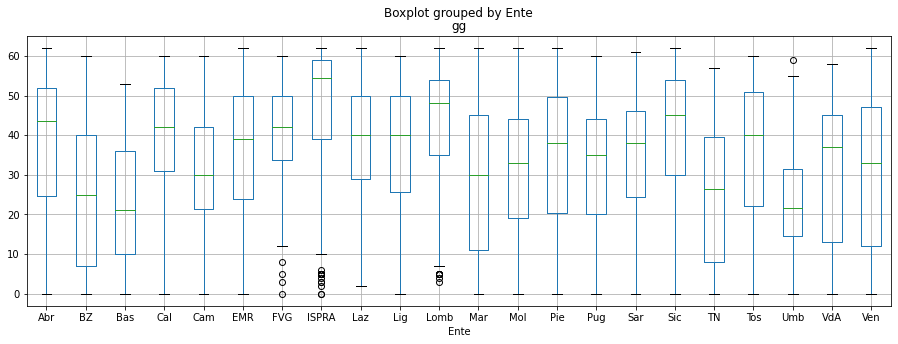

In [4]:
boxplot=df_new.query("gg < 63 ").boxplot(column='gg',by='Ente',figsize=[15,5])

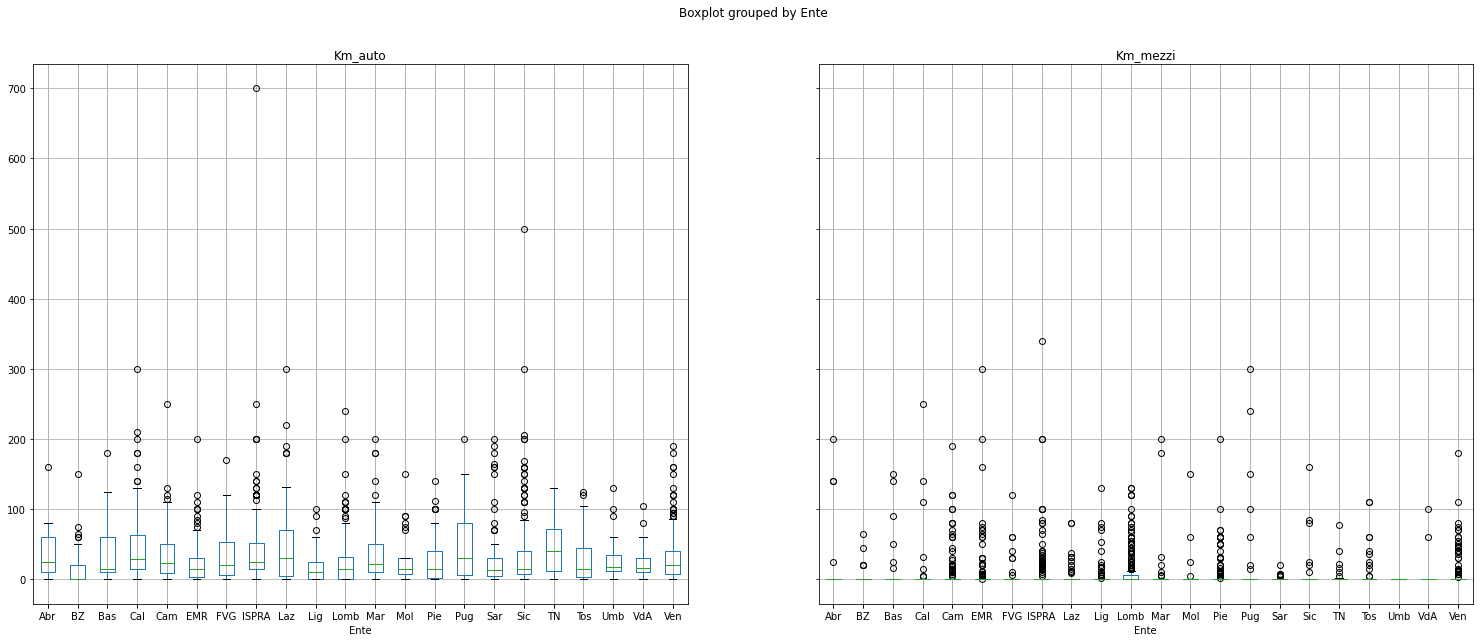

In [7]:
boxplot=df_new.query("gg < 63 ").boxplot(column=['Km_auto','Km_mezzi'],by='Ente',figsize=[25,10])

In [ ]:
df.query("gg < 63 ").groupby('Ente').sum()

,gg,Km_auto,Km_mezzi,Km_bici,Km_piedi,CO2,CO2T
Ente,,,,,,,
Abr,1663.00,1093.0,505.0,6.0,11.5,186.685439,7.026967
BZ,1728.00,817.0,104.0,97.0,22.6,137.714406,3.660620
Bas,1572.00,2259.0,455.0,16.0,25.0,382.477872,8.979977
Cal,4943.00,5669.6,408.0,42.0,122.0,935.029472,38.408132
Cam,8654.00,7675.2,1291.0,188.0,211.7,1276.900081,37.590364
EMR,13552.12,5983.0,1304.0,269.5,152.5,995.937532,31.710407
FVG,3975.00,2828.1,356.0,92.0,18.5,476.803407,18.599352
ISPRA,13495.00,10507.0,2005.0,21.0,68.7,1755.706624,82.257401
Laz,2932.00,3144.0,371.0,13.0,44.9,530.815536,22.056269


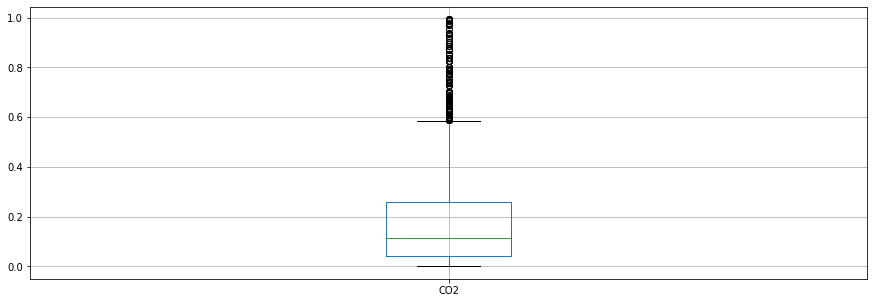

In [ ]:
boxplot=df.query("gg < 63& CO2<1").boxplot(column='CO2',figsize=[15,5])

In [13]:
df_new.query("gg > 30 & gg<63").count()

Data             2300
Ente             2300
gg               2300
mezzo            2300
Km_auto          1821
Km_mezzi         1821
Km_bici          1818
Km_piedi         1817
alimentazione    1821
dtype: int64

In [ ]:
for i in range(1,10):
  print(df.query("gg < 63& CO2>0").CO2.quantile(i/10))

1.0026666
1.6711109999999998
2.5066664999999997
3.3422219999999996
4.1777775
5.013332999999999
6.684443999999999
10.026665999999999
13.368887999999998


In [ ]:
print(df.query("gg < 63& CO2>0 & Km_auto>50").CO2.quantile(.75),df.query("gg < 63& CO2>0& Km_auto>50").CO2.mean())

16.71111 15.437831231612927


In [ ]:
df.query("gg < 63& CO2>0 & Km_auto<50").count()

Data             1728
Ente             1728
gg               1728
mezzo            1728
Km_auto          1728
Km_mezzi         1690
Km_bici          1728
Km_piedi         1727
alimentazione    1728
CO2              1728
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b397b8240>,
      dtype=object)

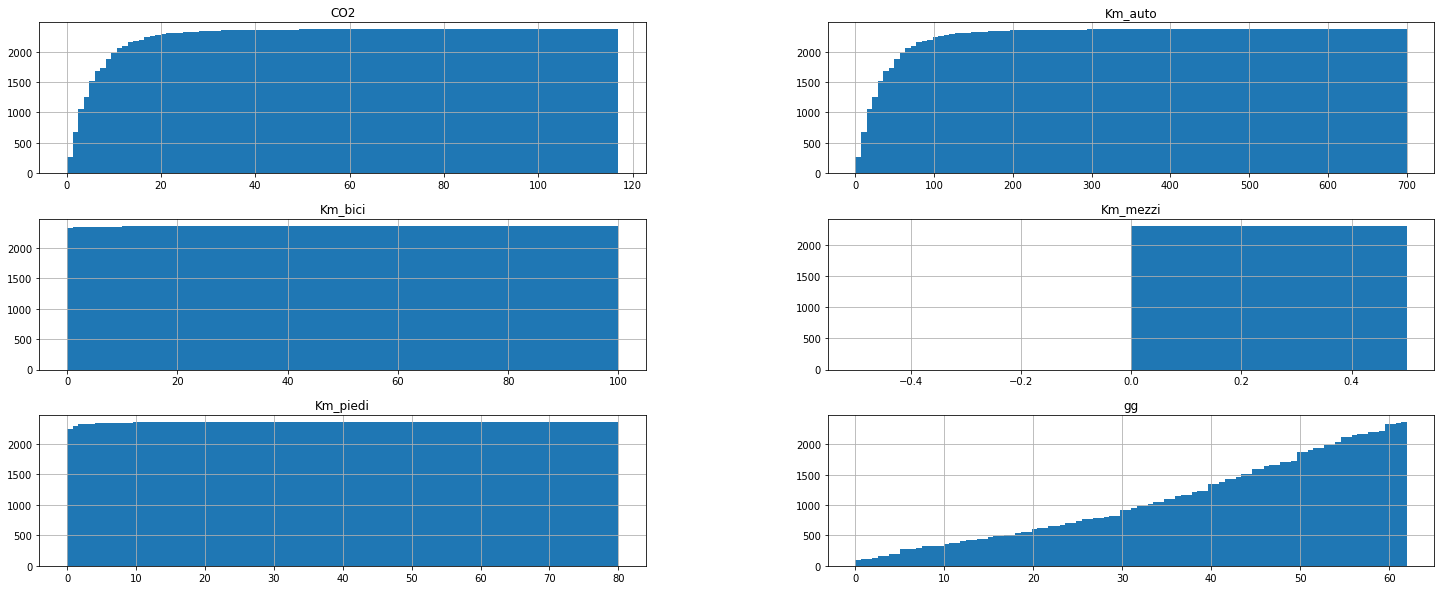

In [ ]:
df.query("CO2>0").hist(bins=100,figsize=[25,10],cumulative=True,histtype='bar')

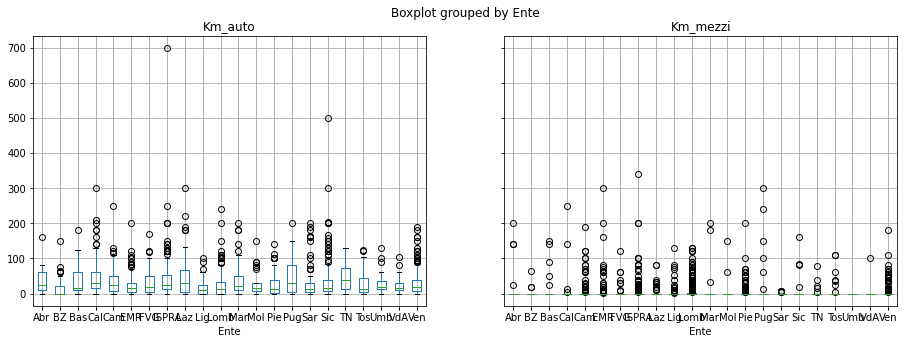

In [ ]:
boxplot=df.query("gg < 63").boxplot(column=['Km_auto','Km_mezzi'],by='Ente',figsize=[15,5])

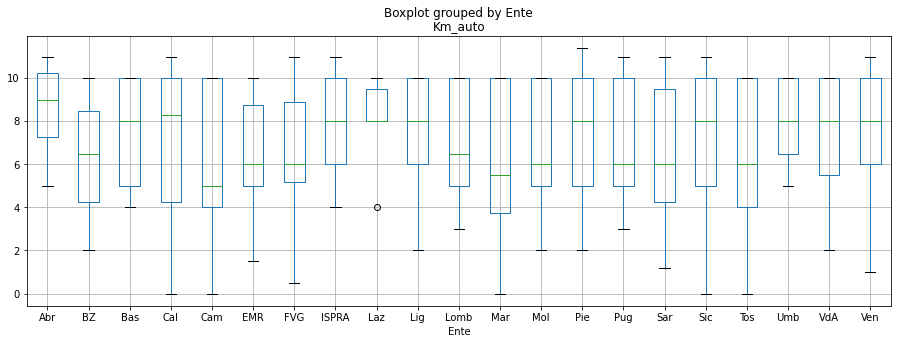

In [ ]:
boxplot=df.query("gg < 63 & Km_auto <12 & mezzo=='Auto/Moto/Scooter/Ciclomotore'").boxplot(column='Km_auto',by='Ente',figsize=[15,5])

In [ ]:
df.groupby('mezzo').size()

mezzo
A piedi                                                                                                                                                                                  130
AUTO- non ci sono mezzi pubblici CAR POOLING                                                                                                                                               1
Auto propria + car pooling 3 persone                                                                                                                                                       1
Auto/A piedi                                                                                                                                                                               1
Auto/Moto/Scooter/Ciclomotore                                                                                                                                                           3061
Bicicletta/monopattino                           

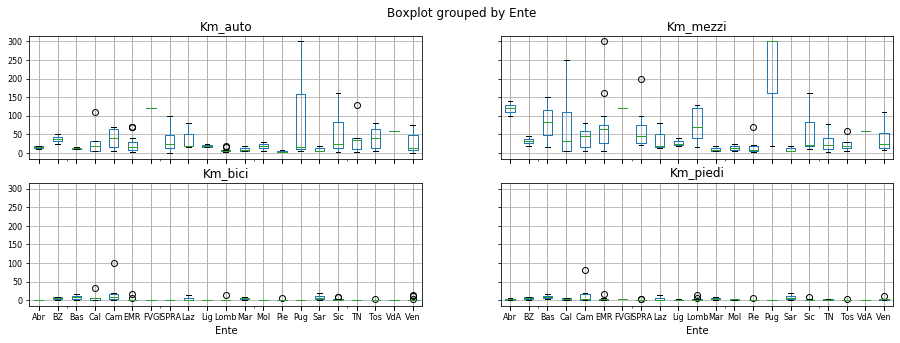

In [ ]:
df_noauto=df.query("Km_auto>0 and Km_mezzi>0")
boxplot=df_noauto.boxplot(column=['Km_auto','Km_mezzi','Km_bici','Km_piedi'],by='Ente',figsize=[15,5],fontsize=8)


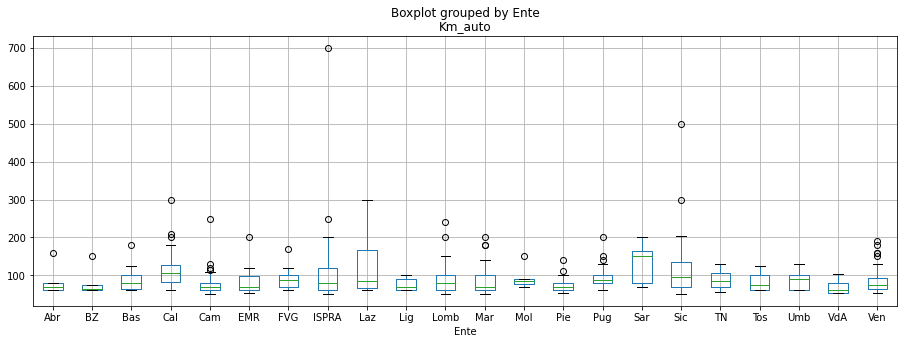

In [ ]:
boxplot=df.query("Km_auto>50 & gg<63").boxplot(column='Km_auto',by='Ente',figsize=[15,5])


In [ ]:
df.query("Km_auto>50 & gg<63").groupby('Ente').size()

Ente
Abr       9
BZ        5
Bas      17
Cal      34
Cam      59
EMR      22
FVG      20
ISPRA    65
Laz      22
Lig       5
Lomb     34
Mar      29
Mol       6
Pie      31
Pug      25
Sar      13
Sic      39
TN       10
Tos      21
Umb       5
VdA       5
Ven      62
dtype: int64

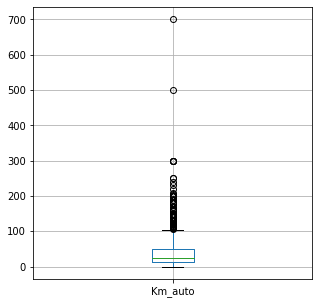

In [ ]:
boxplot=df.query("Km_auto>0").boxplot(column='Km_auto',figsize=[5,5])

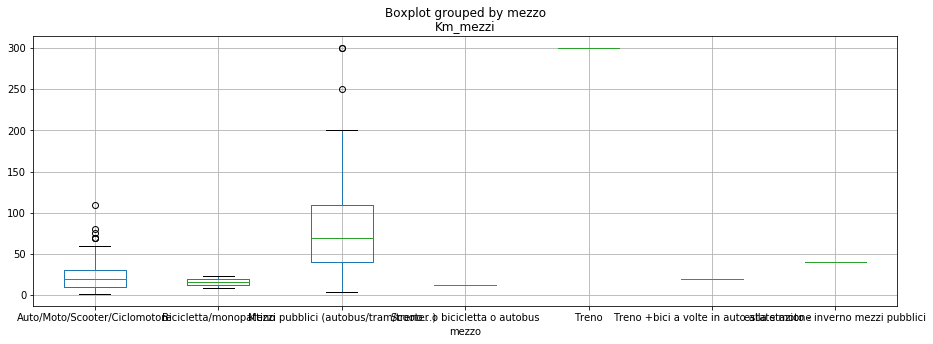

In [ ]:
boxplot=df_noauto.boxplot(column='Km_mezzi',by='mezzo',figsize=[15,5])

# Miscellanea

In [ ]:
df.query("Km_auto>0").quantile(0.75)

gg          51.0
Km_auto     50.0
Km_mezzi     0.0
Km_bici      0.0
Km_piedi     0.0
Name: 0.75, dtype: float64

In [ ]:
df_old.query("gg>63").count()

Data             231
Ente             231
gg               231
mezzo            231
Km_auto          183
Km_mezzi         183
Km_bici          183
Km_piedi         183
alimentazione    183
dtype: int64

In [ ]:
df.query("Km_bici>50")

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione
3842,2020/06/25 11:56:27 AM EET,Cam,10.0,Auto/Moto/Scooter/Ciclomotore,70.0,80.0,100.0,80.0,Metano


In [ ]:
df.loc[396]

Data_ora                       2020/06/05 9:46:50 AM EET
Ente                                                 Ven
giorni                                                55
mezzo                             Bicicletta/monopattino
Km_auto                                                0
Km_mezzi                                               0
Km_bici                                                4
Km_piedi                                               0
alimentazione    NON USO QUESTA MODALITA' DI SPOSTAMENTO
Name: 396, dtype: object

In [ ]:
df.loc[3637,['Km_piedi']]=np.nan

In [ ]:
df_app=df.query("mezzo=='Mezzi pubblici (autobus/tram/treno...)' & Km_auto>0 &Km_mezzi>0")


In [ ]:
df_app.query("Km_auto==Km_mezzi")

,Data,Ente,gg,mezzo,Km_auto,Km_mezzi,Km_bici,Km_piedi,alimentazione
814,2020/06/05 12:26:49 PM EET,Laz,55.0,Mezzi pubblici (autobus/tram/treno...),80.0,80.0,0.0,0.0,GPL
1259,2020/06/08 2:47:04 PM EET,Ven,0.0,Mezzi pubblici (autobus/tram/treno...),12.0,12.0,12.0,12.0,Benzina
1719,2020/06/10 9:51:41 AM EET,Ven,13.0,Mezzi pubblici (autobus/tram/treno...),50.0,50.0,0.0,0.0,Diesel
1980,2020/06/10 11:33:30 AM EET,Lig,4.0,Mezzi pubblici (autobus/tram/treno...),25.0,25.0,0.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
2167,2020/06/10 2:29:11 PM EET,Pug,65.0,Mezzi pubblici (autobus/tram/treno...),300.0,300.0,0.0,1.0,Diesel
2223,2020/06/10 3:44:08 PM EET,ISPRA,60.0,Mezzi pubblici (autobus/tram/treno...),25.0,25.0,0.0,0.0,Diesel
2630,2020/06/15 7:21:56 AM EET,Ven,21.0,Mezzi pubblici (autobus/tram/treno...),46.0,46.0,0.0,2.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO
2735,2020/06/17 9:03:06 AM EET,ISPRA,47.0,Mezzi pubblici (autobus/tram/treno...),100.0,100.0,0.0,2.0,Diesel
2847,2020/06/17 9:40:15 AM EET,FVG,55.0,Mezzi pubblici (autobus/tram/treno...),120.0,120.0,0.0,3.0,Benzina
3243,2020/06/18 10:36:03 AM EET,Pie,37.0,Mezzi pubblici (autobus/tram/treno...),7.0,7.0,0.0,0.0,NON USO QUESTA MODALITA' DI SPOSTAMENTO


In [ ]:
import numpy as np
for i in df_app.query("Km_auto==Km_mezzi").iterrows():
  print (i[0])
  df.loc[i[0],['Km_auto']]=np.nan

814
1259
1719
1980
2167
2223
2630
2735
2847
3243
3273
3485
3662


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b38d03ac8>,
      dtype=object)

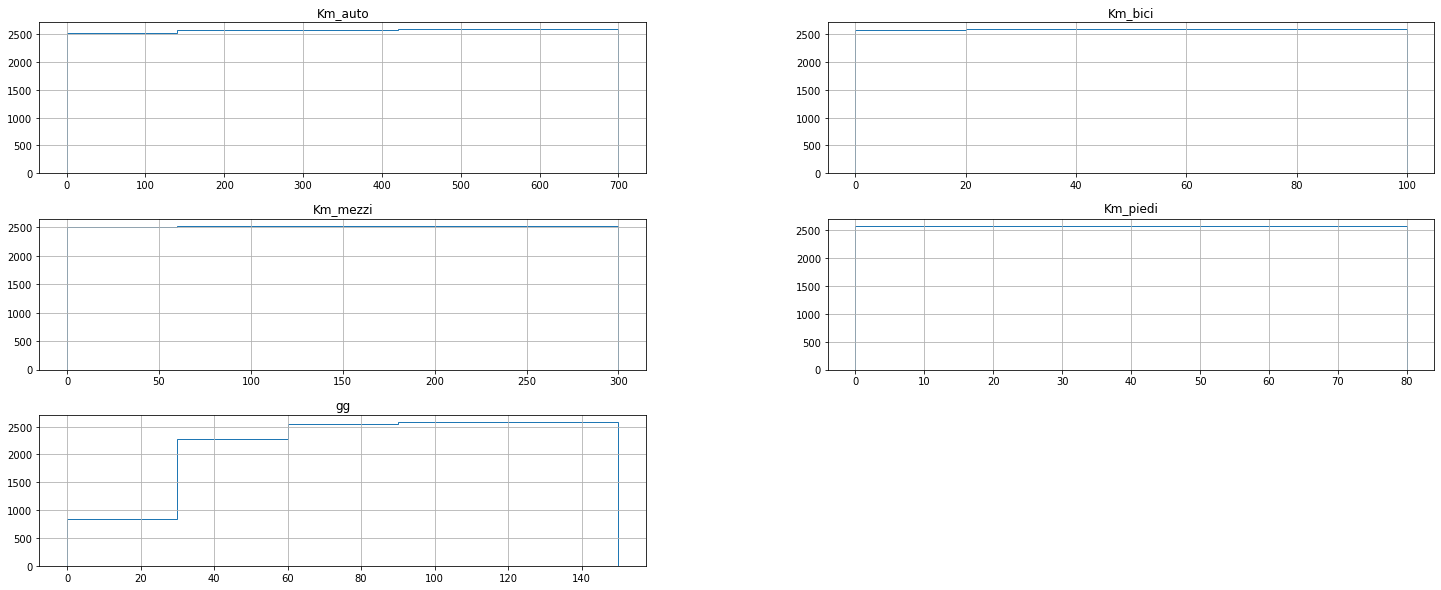

In [ ]:
df.query("Km_auto>0").hist(bins=5,figsize=[25,10],cumulative=True,histtype='step')

In [ ]:
df.query("gg>62").groupby('Data').sum()

,gg,Km_auto,Km_mezzi,Km_bici,Km_piedi
Data,,,,,
2020/06/05 10:00:24 AM EET,63.0,75.0,0.0,0.0,0.0
2020/06/05 10:01:28 AM EET,76.0,0.0,0.0,0.0,2.0
2020/06/05 10:04:44 AM EET,77.0,20.0,0.0,0.0,0.0
2020/06/05 10:09:03 AM EET,87.0,6.0,0.0,0.0,0.0
2020/06/05 10:27:00 AM EET,92.0,10.0,0.0,0.0,0.0
...,...,...,...,...,...
2020/06/25 8:57:20 AM EET,90.0,90.0,0.0,10.0,4.0
2020/06/25 9:18:30 AM EET,70.0,0.0,0.0,0.0,0.0
2020/06/25 9:19:56 AM EET,70.0,230.0,0.0,0.0,0.0
